### Data fields
Id - an anonymous id given to an Employee

Age - Age of an Employee

Attrition - Did the Employee leave the company, 0-No, 1-Yes

BusinessTravel - Travlling frequency of an Employee

Department - Work Department

DistanceFromHome - Distance of office from home

EducationField - Field of Education

EmployeeNumber - Number of Employees in the division of a given 

Employee

EnvironmentSatisfaction - Work Environment Satisfaction

Gender - Gender of Employee

MartialStatus - Martial Status of an employee

MonthlyIncome - Monthly Income of Employee in USD

NumCompaniesWorked - Number of Companies in which Employee has 
worked before joining this Company

OverTime - Does The person work overtime

PercentSalaryHike - Average annual salary hike in percentages

StockOptionLevel - Company stocks given to an Employee

TotalWorkingYears - Total working experience of an employee

TrainingTimesLastYear - No. of trainings an employee went through last year

YearsAtCompany - Number of years worked at this company

YearsInCurrentRole - Number of years in current role

YearsSinceLastPromotion - Number of years since last promotion

YearsWithCurrManager - Number of years with the current manager

### Education

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

### EnvironmentSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

### JobInvolvement

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

### JobSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

### PerformanceRating

1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

### Behaviour

1 'Good'
2 'Bad'
3 'Not Rated'

### CommunicationSkill

1 'Bad'
2 'Average'
3 'Good'
4 'Better'
5 'Best'

### StockOptionLevel

0 'No stocks'
1 'Less Stocks'
2 'Moderate Stocks'
3 'A lot of Stocks'

In [1]:
#Here We Go

In [130]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
train_df = pd.read_csv('train.csv') # Reading training data.
train_df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [132]:
# Let's see what are the non-int fields
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
Id                         1628 non-null int64
Age                        1628 non-null int64
Attrition                  1628 non-null int64
BusinessTravel             1628 non-null object
Department                 1628 non-null object
DistanceFromHome           1628 non-null int64
Education                  1628 non-null int64
EducationField             1628 non-null object
EmployeeNumber             1628 non-null int64
EnvironmentSatisfaction    1628 non-null int64
Gender                     1628 non-null object
JobInvolvement             1628 non-null int64
JobRole                    1628 non-null object
JobSatisfaction            1628 non-null int64
MaritalStatus              1628 non-null object
MonthlyIncome              1628 non-null int64
NumCompaniesWorked         1628 non-null int64
OverTime                   1628 non-null object
PercentSalaryHike          1628 non-null

In [133]:
#Let's see How to encode these 7 object fields.

In [134]:

train_df = pd.get_dummies(train_df)

In [149]:
# Since there are a large number of distinct entries in the fields, So we will use Label Encoding
from sklearn.preprocessing import LabelEncoder

#creating instance of labelencoder
labelencoder = LabelEncoder()

In [150]:
train_df['BusinessTravel'] = labelencoder.fit_transform(train_df['BusinessTravel'])
train_df['Department'] = labelencoder.fit_transform(train_df['Department'])
train_df['EducationField'] = labelencoder.fit_transform(train_df['EducationField'])
train_df['Gender'] = labelencoder.fit_transform(train_df['Gender'])
train_df['JobRole'] = labelencoder.fit_transform(train_df['JobRole'])
train_df['MaritalStatus'] = labelencoder.fit_transform(train_df['MaritalStatus'])
train_df['OverTime'] = labelencoder.fit_transform(train_df['OverTime'])

In [51]:
(train_df['Attrition'].value_counts()/len(train_df))*100

0    51.781327
1    48.218673
Name: Attrition, dtype: float64

In [52]:
train_df.head()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,30,0,2,3,571,3,3,4,2564,...,0,0,0,0,0,0,0,1,1,0
1,2,36,0,12,4,1614,3,3,3,4663,...,1,0,0,0,0,0,1,0,0,1
2,3,55,1,2,1,842,3,3,4,5160,...,0,0,0,1,0,0,0,1,1,0
3,4,39,0,24,1,2014,1,3,4,4108,...,0,0,1,0,0,0,0,1,1,0
4,5,37,0,3,3,689,3,3,3,9434,...,1,0,0,0,0,0,1,0,1,0


In [153]:
train_df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
Id                         1628 non-null int64
Age                        1628 non-null int64
Attrition                  1628 non-null int64
BusinessTravel             1628 non-null int64
Department                 1628 non-null int64
DistanceFromHome           1628 non-null int64
Education                  1628 non-null int64
EducationField             1628 non-null int64
EmployeeNumber             1628 non-null int64
EnvironmentSatisfaction    1628 non-null int64
Gender                     1628 non-null int64
JobInvolvement             1628 non-null int64
JobRole                    1628 non-null int64
JobSatisfaction            1628 non-null int64
MaritalStatus              1628 non-null int64
MonthlyIncome              1628 non-null int64
NumCompaniesWorked         1628 non-null int64
OverTime                   1628 non-null int64
PercentSalaryHike          1628 non-null int64


In [155]:
# No null columns. Perfect.

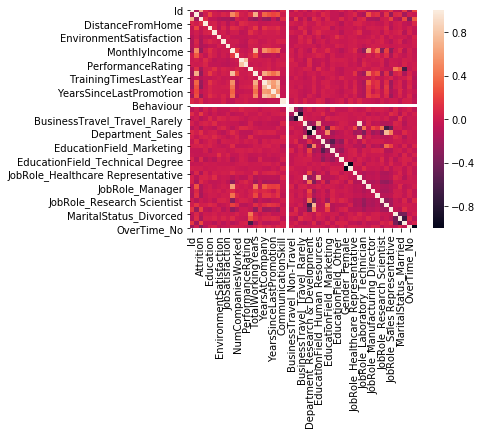

In [70]:
# Lets visualise correlation 
sns.heatmap(train_df.corr(), square = True)

In [71]:
# This function list the correlations with value > 0
def get_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr>0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]

In [72]:
print(get_corr('Attrition', train_df))

Attrition                           1.000000
Id                                  0.694838
OverTime_Yes                        0.321194
MaritalStatus_Single                0.230235
JobRole_Sales Representative        0.208208
BusinessTravel_Travel_Frequently    0.172831
Department_Sales                    0.131841
DistanceFromHome                    0.109224
CommunicationSkill                  0.103379
JobRole_Laboratory Technician       0.095561
EducationField_Technical Degree     0.089876
EducationField_Marketing            0.075419
JobRole_Human Resources             0.061480
EducationField_Human Resources      0.045361
NumCompaniesWorked                  0.034763
Department_Human Resources          0.033598
JobRole_Sales Executive             0.026533
Gender_Male                         0.024573
PerformanceRating                   0.010202
JobRole_Research Scientist          0.001735
Name: Attrition, dtype: float64


In [159]:
print(train_df['Id'].nunique())

1628


In [99]:
train_df_new = train_df

In [100]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(train_df_new)

array([[   1,   30,    0, ...,    1,    1,    0],
       [   2,   36,    0, ...,    0,    0,    1],
       [   3,   55,    1, ...,    1,    1,    0],
       ...,
       [1626,   25,    1, ...,    0,    1,    0],
       [1627,   29,    1, ...,    0,    0,    1],
       [1628,   29,    1, ...,    1,    0,    1]])

In [101]:
train_df_new.columns

Index(['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill', 'Behaviour', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Te

In [106]:
#Checking for negative correlation
def get_neg_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr<=0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]

print(get_neg_corr('Attrition', train_df))

PercentSalaryHike                   -0.012668
Gender_Female                       -0.024573
EducationField_Other                -0.033078
Education                           -0.041390
EducationField_Medical              -0.042741
YearsSinceLastPromotion             -0.050379
EmployeeNumber                      -0.051512
EducationField_Life Sciences        -0.064247
MaritalStatus_Divorced              -0.086467
BusinessTravel_Travel_Rarely        -0.099553
TrainingTimesLastYear               -0.105663
BusinessTravel_Non-Travel           -0.107556
EnvironmentSatisfaction             -0.111746
JobRole_Manager                     -0.125853
JobRole_Manufacturing Director      -0.132839
JobRole_Healthcare Representative   -0.137328
Department_Research & Development   -0.143262
JobSatisfaction                     -0.148012
MaritalStatus_Married               -0.157919
JobInvolvement                      -0.159710
JobRole_Research Director           -0.166381
StockOptionLevel                  

In [135]:
#Lets check for logistic regression on the given drainset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df_new.drop('Attrition', axis=1),
                                                 train_df_new['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)

In [139]:
train_df['EmployeeNumber']

0        571
1       1614
2        842
3       2014
4        689
        ... 
1623     752
1624     842
1625    1439
1626    1844
1627     315
Name: EmployeeNumber, Length: 1628, dtype: int64

In [142]:
x_train['YearsInCurrentRole'].values[x_train['YearsInCurrentRole'] < 5] = 5
x_test['YearsInCurrentRole'].values[x_test['YearsInCurrentRole'] < 5] = 5
test_df['YearsInCurrentRole'].values[test_df['YearsInCurrentRole'] < 5] = 5

In [131]:
x_train['OverTime'] = x_train['OverTime']*100
x_test['OverTime'] = x_test['OverTime']*100

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# x_test = x_test.drop('EmployeeNumber', axis=1)
# x_train = x_train.drop('EmployeeNumber',axis=1)
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.57
The accuracy of the Logistic Regression is 89.46


In [138]:
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('Sample_submission.csv')

In [139]:
test_df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [64]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 50 columns):
Id                                   1628 non-null int64
Age                                  1628 non-null int64
Attrition                            1628 non-null int64
DistanceFromHome                     1628 non-null int64
Education                            1628 non-null int64
EmployeeNumber                       1628 non-null int64
EnvironmentSatisfaction              1628 non-null int64
JobInvolvement                       1628 non-null int64
JobSatisfaction                      1628 non-null int64
MonthlyIncome                        1628 non-null int64
NumCompaniesWorked                   1628 non-null int64
PercentSalaryHike                    1628 non-null int64
PerformanceRating                    1628 non-null int64
StockOptionLevel                     1628 non-null int64
TotalWorkingYears                    1628 non-null int64
TrainingTimesLastYear                1

In [66]:
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 771 to 538
Data columns (total 48 columns):
Id                                   489 non-null int64
Age                                  489 non-null int64
DistanceFromHome                     489 non-null int64
Education                            489 non-null int64
EnvironmentSatisfaction              489 non-null int64
JobInvolvement                       489 non-null int64
JobSatisfaction                      489 non-null int64
MonthlyIncome                        489 non-null int64
NumCompaniesWorked                   489 non-null int64
PercentSalaryHike                    489 non-null int64
PerformanceRating                    489 non-null int64
StockOptionLevel                     489 non-null int64
TotalWorkingYears                    489 non-null int64
TrainingTimesLastYear                489 non-null int64
YearsAtCompany                       489 non-null int64
YearsInCurrentRole                   489 non-null int

In [140]:
test_df = test_df.drop('EmployeeNumber', axis = 1)

In [141]:
test_df = pd.get_dummies(test_df)

In [28]:
test_df['BusinessTravel'] = labelencoder.fit_transform(test_df['BusinessTravel'])
test_df['Department'] = labelencoder.fit_transform(test_df['Department'])
test_df['EducationField'] = labelencoder.fit_transform(test_df['EducationField'])
test_df['Gender'] = labelencoder.fit_transform(test_df['Gender'])
test_df['JobRole'] = labelencoder.fit_transform(test_df['JobRole'])
test_df['MaritalStatus'] = labelencoder.fit_transform(test_df['MaritalStatus'])
test_df['OverTime'] = labelencoder.fit_transform(test_df['OverTime'])

In [29]:
def label_encoding(col):
    print(train_df[col].nunique(), end=" ")
    print(test_df[col].nunique())

In [30]:
for cols in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime' ]:
    label_encoding(cols)

3 3
3 3
6 6
2 2
9 9
3 3
2 2


In [138]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(test_df)

array([[  1,  28,   2, ...,   0,   4,   5],
       [  2,  31,   2, ...,   5,   7,   3],
       [  3,  37,   2, ...,   6,   7,   4],
       ...,
       [468,  24,   2, ...,   1,   4,   1],
       [469,  31,   2, ...,   7,   8,   3],
       [470,  36,   2, ...,   0,   2,   5]])

In [140]:
test_df['EmployeeNumber'] = test_df['EmployeeNumber'].div(100)
test_df['OverTime'] = test_df['OverTime']*100

In [122]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 841 to 1061
Data columns (total 49 columns):
Id                                   1139 non-null int64
Age                                  1139 non-null int64
DistanceFromHome                     1139 non-null int64
Education                            1139 non-null int64
EmployeeNumber                       1139 non-null int64
EnvironmentSatisfaction              1139 non-null int64
JobInvolvement                       1139 non-null int64
JobSatisfaction                      1139 non-null int64
MonthlyIncome                        1139 non-null float64
NumCompaniesWorked                   1139 non-null int64
PercentSalaryHike                    1139 non-null int64
PerformanceRating                    1139 non-null int64
StockOptionLevel                     1139 non-null int64
TotalWorkingYears                    1139 non-null int64
TrainingTimesLastYear                1139 non-null int64
YearsAtCompany                    

In [143]:
submission.head()
a = lr.predict_proba(test_df)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
# submission.head()

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
submission.head()

,Id,Attrition
0,1,0.005113
1,2,0.003324
2,3,0.029450
3,4,0.047456
4,5,0.001310


In [145]:
submission.to_csv('Sample_submission.csv', index=False)

In [146]:
submission

,Id,Attrition
0,1,0.005113
1,2,0.003324
2,3,0.029450
3,4,0.047456
4,5,0.001310
...,...,...
465,466,0.333039
466,467,0.836083
467,468,0.132035
468,469,0.081743


In [100]:
submission.describe

<bound method NDFrame.describe of       Id  Attrition
0      1   0.010794
1      2   0.003058
2      3   0.029131
3      4   0.043778
4      5   0.002267
..   ...        ...
465  466   0.310572
466  467   0.695032
467  468   0.144800
468  469   0.399116
469  470   0.069050

[470 rows x 2 columns]>

In [101]:
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 86.74


In [99]:
train_df

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,0,1,2,3,3,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,2,1,12,4,1,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,2,1,24,1,1,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,2,1,3,3,4,689,3,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,1,1,1,19,3,3,752,3,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,1,2,2,9,2,1,1439,1,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,1,2,0,13,3,0,1844,1,...,3,3,4,3,2,2,2,0,5,1


In [101]:
train_df_new = train_df.drop('Id',axis=1)
train_df_new

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,0,1,2,3,3,571,3,0,...,3,0,12,2,11,7,6,7,4,1
1,36,0,2,1,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,1,2,1
2,55,1,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,3,5,1
3,39,0,2,1,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,7,4,1
4,37,0,2,1,3,3,4,689,3,1,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,42,1,1,1,19,3,3,752,3,1,...,3,0,7,2,2,2,2,2,3,1
1624,55,1,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,3,5,1
1625,25,1,2,2,9,2,1,1439,1,1,...,3,0,6,2,3,2,2,2,5,1
1626,29,1,2,0,13,3,0,1844,1,1,...,3,3,4,3,2,2,2,0,5,1


In [74]:

x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))

The accuracy of the Logistic Regression is 89.37


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 88.5


In [90]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 6)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

94.29

In [91]:
# y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

89.37

In [80]:
for i in range(100):
    decision_tree = DecisionTreeClassifier(max_depth=i+1)
    decision_tree.fit(x_train, y_train)
    print(f'{i} {round(decision_tree.score(x_test, y_test) * 100, 2)}')

0 92.02
1 92.02
2 92.02
3 89.98
4 89.98
5 89.57
6 90.18
7 89.78
8 88.75
9 88.55
10 87.93
11 87.53
12 87.93
13 87.53
14 87.32
15 88.14
16 88.14
17 87.32
18 87.93
19 87.53
20 87.73
21 88.34
22 88.55
23 87.32
24 87.73
25 88.96
26 87.53
27 87.53
28 88.14
29 88.55
30 87.32
31 88.14
32 88.55
33 88.34
34 87.53
35 87.12
36 88.34
37 87.12
38 87.53
39 87.32
40 87.12
41 88.14
42 87.73
43 88.14
44 87.53
45 87.53
46 87.53
47 87.93
48 88.14
49 88.34
50 87.12
51 87.73
52 86.91
53 87.93
54 87.93
55 88.14
56 87.53
57 87.32
58 87.12
59 88.55
60 86.91
61 86.91
62 87.73
63 87.93
64 87.93
65 88.55
66 87.12
67 88.96
68 88.34
69 88.75
70 88.14
71 88.96
72 87.12
73 86.91
74 87.73
75 88.55
76 88.14
77 87.73
78 88.55
79 87.93
80 87.73
81 87.53
82 87.73
83 87.53
84 87.53
85 87.73
86 87.73
87 87.73
88 87.32
89 88.75
90 88.14
91 88.75
92 87.93
93 88.34
94 88.55
95 88.14
96 88.14
97 87.73
98 87.12
99 88.75


In [81]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 1)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [96]:
test_df

,Id,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,28,9,3,4,3,4,2070,1,23,...,0,0,1,0,0,0,1,0,1,0
1,2,31,6,4,1,4,4,5460,4,22,...,0,0,0,1,0,1,0,0,1,0
2,3,37,6,3,3,4,1,5974,4,13,...,0,0,1,0,0,1,0,0,0,1
3,4,42,1,2,4,2,4,6062,9,13,...,1,0,0,0,0,0,1,0,0,1
4,5,45,4,2,3,3,2,4447,1,12,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,32,2,4,4,3,2,1393,1,12,...,0,0,0,0,0,0,0,1,1,0
466,467,18,3,2,2,3,4,1569,1,12,...,0,0,0,0,1,0,0,1,0,1
467,468,24,23,3,2,4,4,2725,1,11,...,0,0,1,0,0,0,1,0,0,1
468,469,31,23,3,2,2,4,5582,0,21,...,0,0,0,0,0,0,1,0,1,0


In [134]:
test_df_new = test_df.drop('Id', axis=1)
test_df_new

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,28,2,1,9,3,3,377,4,1,3,...,4,1,5,3,5,2,0,4,5,1
1,31,2,2,6,4,3,653,1,1,4,...,4,2,13,4,7,7,5,7,3,1
2,37,2,1,6,3,3,474,3,1,4,...,3,2,13,2,7,7,6,7,4,1
3,42,2,1,1,2,1,827,4,0,2,...,3,1,8,4,4,3,0,2,5,1
4,45,0,1,4,2,1,972,3,1,3,...,3,0,9,5,9,7,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,2,1,2,4,1,1692,4,1,3,...,3,0,1,2,1,0,0,0,5,1
466,18,1,2,3,2,3,1624,2,0,3,...,3,0,0,2,0,0,0,0,2,1
467,24,2,1,23,3,3,639,2,1,4,...,3,2,6,3,6,5,1,4,1,1
468,31,2,1,23,3,3,367,2,1,2,...,4,1,10,2,9,0,7,8,3,1


In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 50 columns):
Id                                   1628 non-null int64
Age                                  1628 non-null int64
Attrition                            1628 non-null int64
DistanceFromHome                     1628 non-null int64
Education                            1628 non-null int64
EmployeeNumber                       1628 non-null int64
EnvironmentSatisfaction              1628 non-null int64
JobInvolvement                       1628 non-null int64
JobSatisfaction                      1628 non-null int64
MonthlyIncome                        1628 non-null int64
NumCompaniesWorked                   1628 non-null int64
PercentSalaryHike                    1628 non-null int64
PerformanceRating                    1628 non-null int64
StockOptionLevel                     1628 non-null int64
TotalWorkingYears                    1628 non-null int64
TrainingTimesLastYear                1

In [119]:
submission.head()
a = decision_tree.predict_proba(test_df)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])

ValueError: Number of features of the model must match the input. Model n_features is 49 and input n_features is 48 

In [136]:
submission.to_csv('Sample_submission.csv', index=False)
submission

,Id,Attrition
0,1,0.000000
1,2,0.666667
2,3,0.115942
3,4,0.115942
4,5,0.124138
...,...,...
465,466,0.060000
466,467,0.921260
467,468,0.921260
468,469,0.124138


In [118]:
#Conclusion Dont use decision Tree for predict_proba. Let's Try using random forest classifier

In [92]:
x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.25,
                                                 random_state=1)

In [93]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC(max_depth=5)
rfc_b.fit(x_train,y_train)
y_pred = rfc_b.predict(x_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(x_test)))

Train accuracy score: 0.9312039312039312
Test accuracy score: 0.941031941031941


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
submission.head()
test_df = test_df.drop('EmployeeNumber', axis = 1)
a = rfc_b.predict_proba(test_df)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head()

KeyError: "['EmployeeNumber'] not found in axis"

In [142]:
submission

,Id,Attrition
0,1,0.260445
1,2,0.211958
2,3,0.176143
3,4,0.309947
4,5,0.066804
...,...,...
465,466,0.478417
466,467,0.697788
467,468,0.528030
468,469,0.195817


In [144]:
submission.to_csv('Sample_submission.csv', index = False)

In [145]:
#Got score of 0.77

In [148]:
#Let's try K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
for i in range(25):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_train)
    print(i+1, end=" ")
    print('Train accuracy score:',accuracy_score(y_train,y_pred), end = " ")
    print('Test accuracy score:',accuracy_score(y_test,knn.predict(x_test)))

1 Train accuracy score: 1.0 Test accuracy score: 0.8525798525798526
2 Train accuracy score: 0.9115479115479116 Test accuracy score: 0.8796068796068796
3 Train accuracy score: 0.9099099099099099 Test accuracy score: 0.8845208845208845
4 Train accuracy score: 0.8927108927108927 Test accuracy score: 0.8845208845208845
5 Train accuracy score: 0.895986895986896 Test accuracy score: 0.8771498771498771
6 Train accuracy score: 0.8869778869778869 Test accuracy score: 0.8796068796068796
7 Train accuracy score: 0.8804258804258804 Test accuracy score: 0.8845208845208845
8 Train accuracy score: 0.8673218673218673 Test accuracy score: 0.8771498771498771
9 Train accuracy score: 0.8697788697788698 Test accuracy score: 0.8722358722358723
10 Train accuracy score: 0.8673218673218673 Test accuracy score: 0.8771498771498771
11 Train accuracy score: 0.864045864045864 Test accuracy score: 0.8820638820638821
12 Train accuracy score: 0.8591318591318591 Test accuracy score: 0.8869778869778869
13 Train accuracy 

In [149]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
submission.head()
a = knn.predict_proba(test_df)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Id,Attrition
0,1,0.142857
1,2,0.142857
2,3,0.285714
3,4,0.142857
4,5,0.000000
...,...,...
465,466,0.571429
466,467,0.428571
467,468,0.428571
468,469,0.142857


In [150]:
submission.to_csv('Sample_submission.csv', index = False)

In [151]:
#very bad, 0.59 score

In [155]:
#Lets continue with logistic regression
train_df

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,0,1,2,3,3,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,2,1,12,4,1,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,2,1,24,1,1,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,2,1,3,3,4,689,3,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,1,1,1,19,3,3,752,3,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,1,2,2,9,2,1,1439,1,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,1,2,0,13,3,0,1844,1,...,3,3,4,3,2,2,2,0,5,1


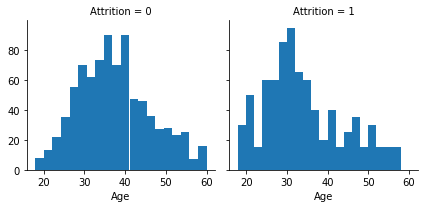

In [156]:
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'Age', bins=20)

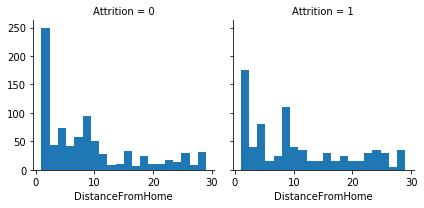

In [157]:
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'DistanceFromHome', bins=20)

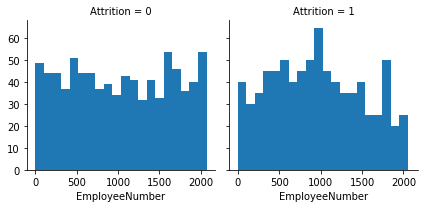

In [158]:
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'EmployeeNumber', bins=20)

In [160]:
# Let us scale the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaler.transform(x_train)

array([[ 0.84524653, -0.79197991,  0.64339494, ..., -1.03123114,
        -0.08866735,  0.        ],
       [ 1.70208956, -0.05251604,  0.64339494, ..., -0.448434  ,
        -0.79167277,  0.        ],
       [ 1.08302047, -0.26379143,  0.64339494, ..., -1.03123114,
        -1.49467819,  0.        ],
       ...,
       [ 0.61604102, -1.2145307 ,  0.64339494, ..., -1.03123114,
        -0.79167277,  0.        ],
       [-1.22831361, -0.89761761,  0.64339494, ..., -0.448434  ,
         1.31734349,  0.        ],
       [ 0.54106725,  0.89822323, -0.93725943, ..., -0.15703543,
        -0.08866735,  0.        ]])

In [162]:
scaler.transform(x_test)

array([[-0.08014395,  0.89822323, -2.5179138 , ..., -1.03123114,
         0.61433807,  0.        ],
       [ 1.41933136, -0.58070452, -0.93725943, ..., -1.03123114,
         0.61433807,  0.        ],
       [ 1.55856835, -1.84835688, -0.93725943, ..., -1.03123114,
        -0.79167277,  0.        ],
       ...,
       [ 1.22868379,  0.68694784, -0.93725943, ...,  3.04834885,
        -0.08866735,  0.        ],
       [-1.55819818, -0.68634222, -0.93725943, ..., -0.73983257,
         1.31734349,  0.        ],
       [ 0.97163088, -0.47506682, -0.93725943, ...,  1.00855885,
         0.61433807,  0.        ]])

In [163]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))

/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 89.43


In [164]:
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 87.88


In [165]:
#Standard scaling not performed very well
x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.25,
                                                 random_state=1)

In [166]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.transform(x_test)

In [167]:
lr = LogisticRegression()
lr.fit(x_train_minmax,y_train)
y_pred_lr = lr.predict(x_test_minmax)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))

/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 89.68


In [168]:
test_df_minmax = min_max_scaler.transform(test_df)
submission.head()
a = lr.predict_proba(test_df_minmax)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<bound method NDFrame.head of       Id  Attrition
0      1   0.014866
1      2   0.006281
2      3   0.056066
3      4   0.057867
4      5   0.006363
..   ...        ...
465  466   0.281292
466  467   0.658735
467  468   0.168000
468  469   0.242486
469  470   0.081751

[470 rows x 2 columns]>

In [169]:
submission.to_csv('Sample_submission.csv', index = False)

In [170]:
#Got score of 82. Lets look for class imbalances

In [25]:
#Let us try using polynomial features.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [32]:
poly = PolynomialFeatures(degree=2)
x_train_ = poly.fit_transform(x_train)
x_test_ = poly.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))

/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 88.75


In [30]:
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 88.94


In [31]:
# We observe that there has been bias lets increase the degree to 3 and check

In [35]:
poly = PolynomialFeatures(degree=1)
x_train_ = poly.fit_transform(x_train)
x_test_ = poly.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.78
The accuracy of the Logistic Regression is 87.27


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
poly = PolynomialFeatures(degree=2)
x_train_ = x_train.drop('Id', axis = 1)
x_test_ = x_test.drop('Id', axis = 1)
x_train_ = poly.fit_transform(x_train_)
x_test_ = poly.fit_transform(x_test_)
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 78.12
The accuracy of the Logistic Regression is 77.7


In [37]:
#Not a good idea to drop 'Id', lets suplicate 'Id'

In [38]:
x_train_ = x_train
x_test_ = x_test
x_train_['Dummy'] = x_train['Id']
x_test_['Dummy'] = x_test['Id']
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.98
The accuracy of the Logistic Regression is 87.27


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
test_df_ = test_df
test_df_['Dummy'] = test_df['Id']

In [43]:
# submission.head()
a = lr.predict_proba(test_df_)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head()
submission.to_csv('Sample_submission.csv', index = False)

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
x_train_ = x_train
x_test_ = x_test
x_train_['Dummy'] = x_train['Id']
x_test_['Dummy'] = x_test['Id']
x_train_['dummy'] = x_train['OverTime']
x_test_['dummy'] = x_test['OverTime']
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.16
The accuracy of the Logistic Regression is 87.36


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
test_df_['dummy'] = test_df['OverTime']
a = lr.predict_proba(test_df_)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head()
submission.to_csv('Sample_submission.csv', index = False)

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
train_df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour', 'Dummy'],
      dtype='object')

In [48]:
x_train_['DDummy'] = x_train['YearsInCurrentRole']
x_test_['DDummy'] = x_test['YearsInCurrentRole']
# x_train_['dummy'] = x_train['OverTime']
# x_test_['dummy'] = x_test['OverTime']
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.78
The accuracy of the Logistic Regression is 87.09


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
x_train_['ddummy'] = x_train['TotalWorkingYears']
x_test_['ddummy'] = x_test['TotalWorkingYears']
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.57
The accuracy of the Logistic Regression is 87.27


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
x_train_['DDDummy'] = x_train['MonthlyIncome']
x_test_['DDDummy'] = x_test['MonthlyIncome']
lr = LogisticRegression()
lr.fit(x_train_,y_train)
y_pred_lr = lr.predict(x_test_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train_)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.78
The accuracy of the Logistic Regression is 87.27


/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
test_df_['DDummy'] = test_df_['YearsInCurrentRole']
test_df_['ddummy'] = test_df_['TotalWorkingYears']
test_df_['DDDummy'] = test_df_['MonthlyIncome']
a = lr.predict_proba(test_df_)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head()
submission.to_csv('Sample_submission.csv', index = False)

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [152]:
# Let us scale the features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.transform(x_test)
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train_minmax,y_train)
y_pred_lr = lr.predict(x_test_minmax)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))

The accuracy of the Logistic Regression is 89.37


In [153]:
y_pred_lr = lr.predict(x_train_minmax)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 88.94


In [68]:
test_df_minmax = min_max_scaler.transform(test_df)
submission.head()
a = lr.predict_proba(test_df_minmax)
# a = np.around(a,20)
# a = ['{:f}'.format(item) for item in a]
# len(submission)
# submission['Attrition'] = a[:1]
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission

ValueError: could not convert string to float: 'Travel_Rarely'

In [57]:
submission.to_csv('Sample_submission.csv', index = False)

In [162]:
train_df

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,0,1,2,3,3,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,2,1,12,4,1,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,2,1,24,1,1,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,2,1,3,3,4,689,3,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,1,1,1,19,3,3,752,3,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,1,2,2,9,2,1,1439,1,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,1,2,0,13,3,0,1844,1,...,3,3,4,3,2,2,2,0,5,1


In [163]:
# This function list the correlations with value > 0
def get_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr>0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]
#Checking for negative correlation
def get_neg_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr<=0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]

print(get_neg_corr('Attrition', train_df))

PercentSalaryHike         -0.012668
BusinessTravel            -0.029573
Education                 -0.041390
YearsSinceLastPromotion   -0.050379
EmployeeNumber            -0.051512
TrainingTimesLastYear     -0.105663
EnvironmentSatisfaction   -0.111746
JobSatisfaction           -0.148012
JobInvolvement            -0.159710
StockOptionLevel          -0.175496
Age                       -0.200596
YearsWithCurrManager      -0.222752
YearsAtCompany            -0.230061
MonthlyIncome             -0.240479
TotalWorkingYears         -0.262922
YearsInCurrentRole        -0.269408
Name: Attrition, dtype: float64


In [164]:
#Let us use SVC
#Lets check for logistic regression on the given drainset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)

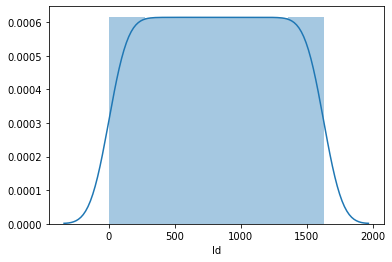

In [172]:
sns.distplot(train_df['Id']);

In [173]:
print(get_corr('Attrition', train_df))

Attrition             1.000000
Id                    0.694838
OverTime              0.321194
MaritalStatus         0.198327
JobRole               0.125322
DistanceFromHome      0.109224
CommunicationSkill    0.103379
Department            0.099875
EducationField        0.046867
NumCompaniesWorked    0.034763
Gender                0.024573
PerformanceRating     0.010202
Name: Attrition, dtype: float64


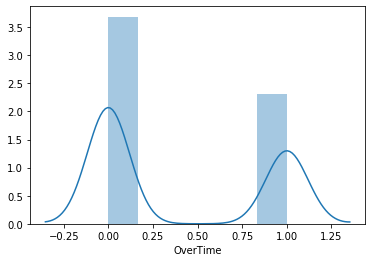

In [174]:
sns.distplot(train_df['OverTime']);

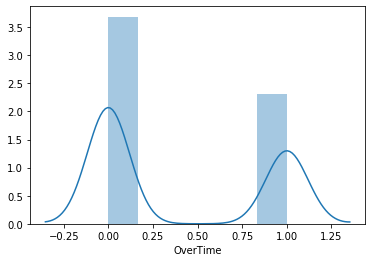

In [175]:
sns.distplot(train_df['OverTime']**(1/2));

Text(0, 0.5, 'Attrition')

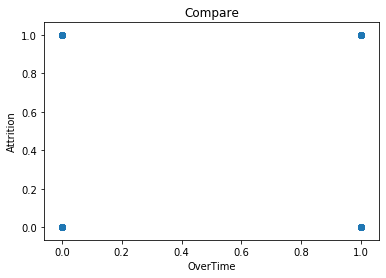

In [177]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(train_df['Attrition'], train_df['OverTime'])
# set a title and labels
ax.set_title('Compare')
ax.set_xlabel('OverTime')
ax.set_ylabel('Attrition')

In [5]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df = pd.read_csv('train.csv') # Reading training data.
train_df.head()
# Since there are a large number of distinct entries in the fields, So we will use Label Encoding
from sklearn.preprocessing import LabelEncoder

#creating instance of labelencoder
labelencoder = LabelEncoder()
train_df['BusinessTravel'] = labelencoder.fit_transform(train_df['BusinessTravel'])
train_df['Department'] = labelencoder.fit_transform(train_df['Department'])
train_df['EducationField'] = labelencoder.fit_transform(train_df['EducationField'])
train_df['Gender'] = labelencoder.fit_transform(train_df['Gender'])
train_df['JobRole'] = labelencoder.fit_transform(train_df['JobRole'])
train_df['MaritalStatus'] = labelencoder.fit_transform(train_df['MaritalStatus'])
train_df['OverTime'] = labelencoder.fit_transform(train_df['OverTime'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 90.18
The accuracy of the Logistic Regression is 86.74


In [150]:
x_train,x_test,y_train,y_test = train_test_split(train_df.drop(['Attrition', 'EmployeeNumber'], axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.37
The accuracy of the Logistic Regression is 88.76


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 50 columns):
Id                                   1628 non-null int64
Age                                  1628 non-null int64
Attrition                            1628 non-null int64
DistanceFromHome                     1628 non-null int64
Education                            1628 non-null int64
EmployeeNumber                       1628 non-null int64
EnvironmentSatisfaction              1628 non-null int64
JobInvolvement                       1628 non-null int64
JobSatisfaction                      1628 non-null int64
MonthlyIncome                        1628 non-null int64
NumCompaniesWorked                   1628 non-null int64
PercentSalaryHike                    1628 non-null int64
PerformanceRating                    1628 non-null int64
StockOptionLevel                     1628 non-null int64
TotalWorkingYears                    1628 non-null int64
TrainingTimesLastYear                1

In [58]:
def get_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr>0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]
#Checking for negative correlation
def get_neg_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr<=0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]

print(get_neg_corr('Attrition', train_df))
print(get_corr('Attrition', train_df))

PercentSalaryHike                   -0.012668
Gender_Female                       -0.024573
EducationField_Other                -0.033078
Education                           -0.041390
EducationField_Medical              -0.042741
YearsSinceLastPromotion             -0.050379
EmployeeNumber                      -0.051512
EducationField_Life Sciences        -0.064247
MaritalStatus_Divorced              -0.086467
BusinessTravel_Travel_Rarely        -0.099553
TrainingTimesLastYear               -0.105663
BusinessTravel_Non-Travel           -0.107556
EnvironmentSatisfaction             -0.111746
JobRole_Manager                     -0.125853
JobRole_Manufacturing Director      -0.132839
JobRole_Healthcare Representative   -0.137328
Department_Research & Development   -0.143262
JobSatisfaction                     -0.148012
MaritalStatus_Married               -0.157919
JobInvolvement                      -0.159710
JobRole_Research Director           -0.166381
StockOptionLevel                  

Text(0, 0.5, 'Attrition')

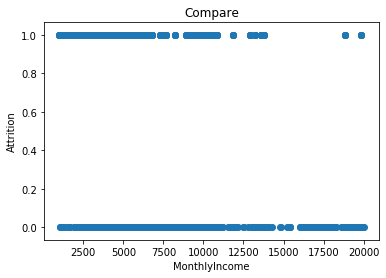

In [10]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(train_df['MonthlyIncome'], train_df['Attrition'])
# set a title and labels
ax.set_title('Compare')
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Attrition')

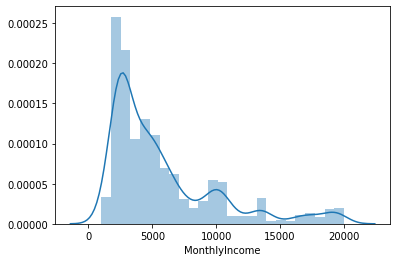

In [11]:
sns.distplot(train_df['MonthlyIncome']);

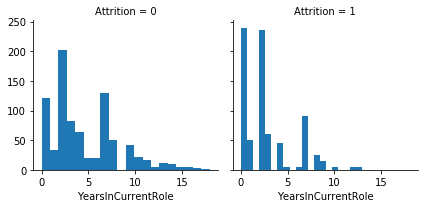

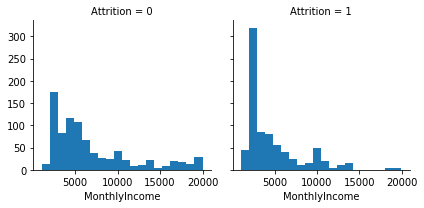

In [110]:
# print(train_df['JobRole'].nunique())
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'YearsInCurrentRole', bins=20)
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=20)


In [149]:
x_train,x_test,y_train,y_test = train_test_split(train_df.drop(['Attrition', 'EmployeeNumber'], axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
x_train['MonthlyIncome'] /= x_train['MonthlyIncome'].mean()
x_test['MonthlyIncome'] /= x_test['MonthlyIncome'].mean()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.16
The accuracy of the Logistic Regression is 88.59


In [148]:
x_train,x_test,y_train,y_test = train_test_split(train_df.drop(['Attrition', 'EmployeeNumber'], axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
x_train['MonthlyIncome'] /= x_train['MonthlyIncome'].mean()
x_test['MonthlyIncome'] /= x_test['MonthlyIncome'].mean()
x_train['Id'] /= x_train['Id'].mean()
x_test['Id'] /= x_test['Id'].mean()
# x_train['OverTime'] *= x_train['OverTime'].mean()
# x_test['OverTime'] *= x_test['OverTime'].mean()
# x_train = x_train.drop('Id', axis = 1)
# x_test = x_test.drop('Id', axis =  1)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# poly = PolynomialFeatures(degree=2)
# x_train = poly.fit_transform(x_train)
# x_test = poly.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 88.75
The accuracy of the Logistic Regression is 88.5


In [31]:
test_df

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,2,1,9,3,3,377,4,1,...,4,1,5,3,5,2,0,4,5,1
1,2,31,2,2,6,4,3,653,1,1,...,4,2,13,4,7,7,5,7,3,1
2,3,37,2,1,6,3,3,474,3,1,...,3,2,13,2,7,7,6,7,4,1
3,4,42,2,1,1,2,1,827,4,0,...,3,1,8,4,4,3,0,2,5,1
4,5,45,0,1,4,2,1,972,3,1,...,3,0,9,5,9,7,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,32,2,1,2,4,1,1692,4,1,...,3,0,1,2,1,0,0,0,5,1
466,467,18,1,2,3,2,3,1624,2,0,...,3,0,0,2,0,0,0,0,2,1
467,468,24,2,1,23,3,3,639,2,1,...,3,2,6,3,6,5,1,4,1,1
468,469,31,2,1,23,3,3,367,2,1,...,4,1,10,2,9,0,7,8,3,1


In [35]:
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('Sample_submission.csv')
test_df['BusinessTravel'] = labelencoder.fit_transform(test_df['BusinessTravel'])
test_df['Department'] = labelencoder.fit_transform(test_df['Department'])
test_df['EducationField'] = labelencoder.fit_transform(test_df['EducationField'])
test_df['Gender'] = labelencoder.fit_transform(test_df['Gender'])
test_df['JobRole'] = labelencoder.fit_transform(test_df['JobRole'])
test_df['MaritalStatus'] = labelencoder.fit_transform(test_df['MaritalStatus'])
test_df['OverTime'] = labelencoder.fit_transform(test_df['OverTime'])
test_df['MonthlyIncome'] /= test_df['MonthlyIncome'].mean()
test_df['Id'] /= test_df['Id'].mean()
test_df['OverTime'] *= test_df['OverTime'].mean()
# x_test['Id'] /= x_test['Id'].mean()
# test_df = test_df.drop('Id', axis = 1)
test_df = test_df.drop('EmployeeNumber', axis = 1)
# test_df = poly.fit_transform(test_df)
submission.head()
a = lr.predict_proba(test_df)
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head
submission.to_csv('Sample_submission.csv', index = False)

/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df = pd.read_csv('train.csv') # Reading training data.
train_df.head()
train_df = pd.get_dummies(train_df)
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('Sample_submission.csv')
train_df['Id'] /= train_df['Id'].mean()
test_df['Id'] /= test_df['Id'].mean()
train_df['MonthlyIncome'] /= train_df['MonthlyIncome'].median()
test_df['MonthlyIncome'] /= test_df['MonthlyIncome'].median()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
x_train['YearsInCurrentRole'].values[x_train['YearsInCurrentRole'] < 5] = 5
x_test['YearsInCurrentRole'].values[x_test['YearsInCurrentRole'] < 5] = 5
test_df['YearsInCurrentRole'].values[test_df['YearsInCurrentRole'] < 5] = 5
x_train['MonthlyIncome'].values[x_train['MonthlyIncome'] > 3] = 3
x_test['MonthlyIncome'].values[x_test['MonthlyIncome'] > 3] = 3
test_df['MonthlyIncome'].values[test_df['MonthlyIncome'] > 3] = 3
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))

The accuracy of the Logistic Regression is 89.78
The accuracy of the Logistic Regression is 89.38


In [34]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df = pd.read_csv('train.csv') # Reading training data.
train_df.head()
train_df = pd.get_dummies(train_df)
test_df = pd.read_csv('test.csv')
test_df = pd.get_dummies(test_df)
submission = pd.read_csv('Sample_submission.csv')
# test_df['Id'] /= train_df['Id'].mean()
# train_df['Id'] /= train_df['Id'].mean()
# test_df['Id'] = test_df.drop('Id', axis = 1)
# train_df['Id'] = train_df.drop('Id', axis = 1)
test_df['EmployeeNumber'] /= train_df['EmployeeNumber'].median()
train_df['EmployeeNumber'] /= train_df['EmployeeNumber'].median()
train_df['MaritalStatusOverTime'] = train_df['MaritalStatus_Single']*train_df['OverTime_Yes']
test_df['MaritalStatusOverTime'] = test_df['MaritalStatus_Single']*test_df['OverTime_Yes']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_df.drop('Attrition', axis=1),
                                                 train_df['Attrition'],
                                                 test_size=0.3,
                                                 random_state=1)
x_train['YearsInCurrentRole'].values[x_train['YearsInCurrentRole'] < 5] = 5
x_test['YearsInCurrentRole'].values[x_test['YearsInCurrentRole'] < 5] = 5
test_df['YearsInCurrentRole'].values[test_df['YearsInCurrentRole'] < 5] = 5
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('The accuracy of the test Logistic Regression is',round(accuracy_score(y_pred_lr,y_test)*100,2))
y_pred_lr = lr.predict(x_train)
print('The accuracy of the train Logistic Regression is',round(accuracy_score(y_pred_lr,y_train)*100,2))
a = lr.predict_proba(test_df)
for i in range(len(submission)):
    submission['Attrition'][i] = '{:f}'.format(a[i][1])
submission.head
submission.to_csv('Sample_submission.csv', index = False)

The accuracy of the test Logistic Regression is 89.16
The accuracy of the train Logistic Regression is 89.64


/home/dristiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


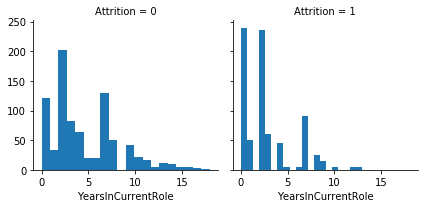

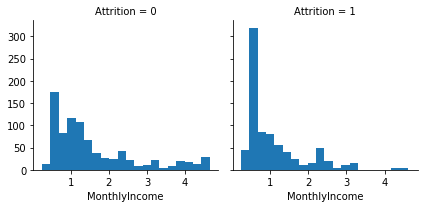

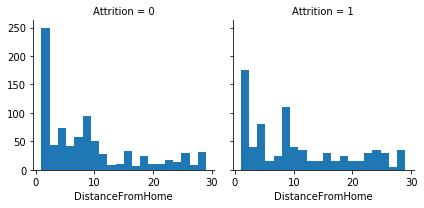

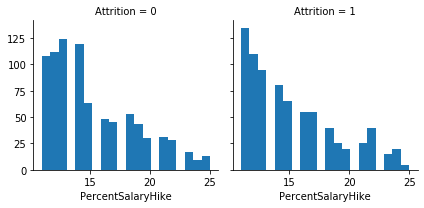

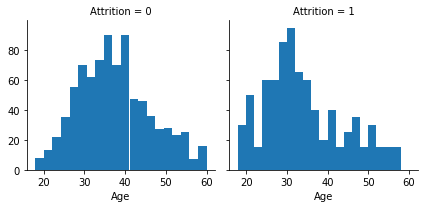

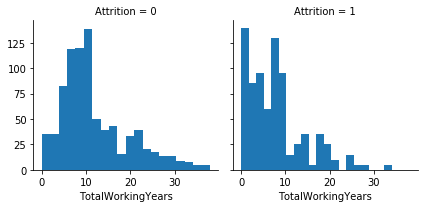

In [21]:
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'YearsInCurrentRole', bins=20)
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=20)
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'DistanceFromHome', bins=20)
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'PercentSalaryHike', bins=20)
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'Age', bins=20)
g = sns.FacetGrid(train_df, col='Attrition')
g.map(plt.hist, 'TotalWorkingYears', bins=20)

In [8]:
train_df['MonthlyIncome']

0       0.595725
1       1.083411
2       1.198885
3       0.954461
4       2.191914
          ...   
1623    0.641032
1624    1.198885
1625    1.022305
1626    0.542519
1627    0.555065
Name: MonthlyIncome, Length: 1628, dtype: float64